# Nonlinear Dimensionality Reduction

## Kernel PCA

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.decomposition import KernelPCA
import seaborn


In [26]:
datasetB=pd.read_csv(r'Downloads\DataB.csv')


In [28]:
X= datasetB.iloc[:, 1:785].values
Y= datasetB.iloc[:,785].values


In [29]:
X_std = StandardScaler().fit_transform(X)

In [4]:

kpca = KernelPCA(n_components=2, kernel='rbf',random_state=42)
X_skernpca = kpca.fit_transform(X)

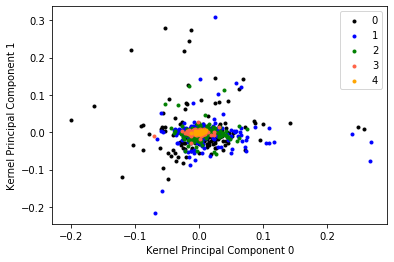

In [5]:
a= ('Class0', 'Class1', 'Class2','Class3','Class4')
b=('black','blue','green','tomato','orange')
target = np.unique(Y)
markers='.','.','.','.','.'
for lab,col,m in zip(target,b,markers):
    #subplot(1,1,1)
    plt.scatter(X_skernpca[Y==lab, 0],
                    X_skernpca[Y==lab, 1], 
                    c=col,
                    label=lab,
                   marker=m)
plt.xlabel('Kernel Principal Component 0')
plt.ylabel('Kernel Principal Component 1')
plt.legend()
plt.show()

## Isomap

In [15]:
import time

In [16]:
time_startiso = time.time()

In [17]:
from sklearn.manifold import Isomap
iso= Isomap(n_components=2)
ndr_iso=iso.fit_transform(X)

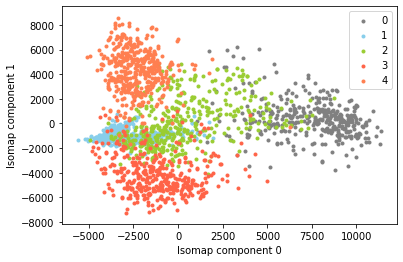

In [18]:
a= ('Class0', 'Class1', 'Class2','Class3','Class4')
b=('grey','skyblue','yellowgreen','tomato','coral')
target = np.unique(Y)
markers='.','.','.','.','.'
for lab,col,m in zip(target,b,markers):
    #subplot(1,1,1)
    plt.scatter(ndr_iso[Y==lab, 0],
                    ndr_iso[Y==lab, 1], 
                    c=col,
                    label=lab,
                   marker=m)
plt.xlabel('Isomap component 0')
plt.ylabel('Isomap component 1')
plt.legend()
plt.show()

In [19]:
time_endiso = time.time()

In [20]:
Timetake= time_endiso-time_startiso
Timetake

14.416962385177612

In [8]:
from sklearn.manifold import LocallyLinearEmbedding 
X_lle = LocallyLinearEmbedding(n_components=2,random_state=42)
lle_ldr=X_lle.fit_transform(X)

In [9]:
lle_ldr.shape

(2066, 2)

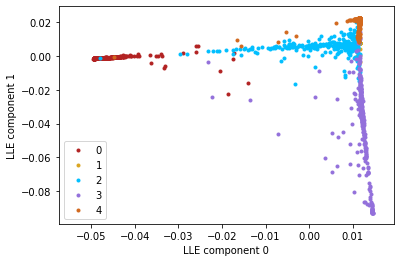

In [10]:
a= ('Class0', 'Class1', 'Class2','Class3','Class4')
b=('firebrick','goldenrod','deepskyblue','mediumpurple','chocolate')
target = np.unique(Y)
markers='.','.','.','.','.'
for lab,col,m in zip(target,b,markers):
    #subplot(1,1,1)
    plt.scatter(lle_ldr[Y==lab, 0],
                    lle_ldr[Y==lab, 1], 
                    c=col,
                    label=lab,
                   marker=m)
plt.xlabel('LLE component 0')
plt.ylabel('LLE component 1')
plt.legend()
plt.show()

In [11]:
from sklearn.manifold import SpectralEmbedding
embedding = SpectralEmbedding(n_components=2,random_state=42)
Laplacianeigen = embedding.fit_transform(X)

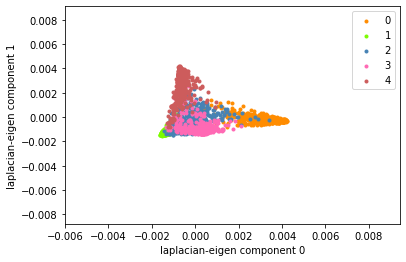

In [12]:
a= ('Class0', 'Class1', 'Class2','Class3','Class4')
b=('darkorange','lawngreen','steelblue','hotpink','indianred')
target = np.unique(Y)
markers='.','.','.','.','.'
for lab,col,m in zip(target,b,markers):
    #subplot(1,1,1)
    plt.scatter(Laplacianeigen[Y==lab, 0],
                    Laplacianeigen[Y==lab, 1], 
                    c=col,
                    label=lab,
                   marker=m)
plt.xlabel('laplacian-eigen component 0')
plt.ylabel('laplacian-eigen component 1')
plt.legend()
plt.show()

In [21]:
time_starttsne = time.time()

In [22]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,random_state=42)
Tsne=X_embedded.fit_transform(X)

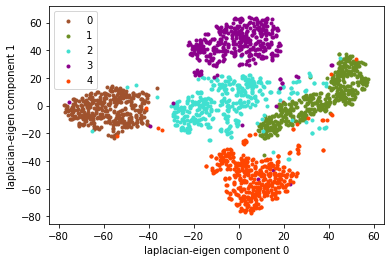

In [23]:
a= ('Class0', 'Class1', 'Class2','Class3','Class4')
b=('sienna','olivedrab','turquoise','darkmagenta','orangered')
target = np.unique(Y)
markers='.','.','.','.','.'
for lab,col,m in zip(target,b,markers):
    #subplot(1,1,1)
    plt.scatter(Tsne[Y==lab, 0],
                    Tsne[Y==lab, 1], 
                    c=col,
                    label=lab,
                   marker=m)
plt.xlabel('laplacian-eigen component 0')
plt.ylabel('laplacian-eigen component 1')
plt.legend()
plt.show()

In [24]:
time_endtsne = time.time()

In [25]:
TimeTaken_tsne=time_endtsne-time_starttsne
TimeTaken_tsne

27.21156620979309

> The Plots illustrates different methods used to classify Dataset B. The performance of all the methods are different from each other in classifying the data. As per the plots, Kernel PCA, Laplacian Eigen methods, Locally Linear Embedding we cant classify the data correctly as the projection of data on the 1st two components gives very less information.Although the classes are distinguished, but most of the data is overlapped in Kernel PCA, Laplacian Eigen methods and in Locally Linear Embedding the only 4 classes are visible. 

> Here, The comparison of ISOMap and t-SNE gives a more information about the classes. The data on the 1st two components is more scattered and interpretation of data is neat when compared to other 3 methods. 

>
For Isomap:
This method classifies classes '0,3,4' clearly, for classes '1,2' the data is overlapped and scattered.
For t-SNE:
This method interprets all the classes evidently, although for classes 1,2 there is slight overlap the method ensure to seperate the classes.

>Three Performance Differences for ISOMAP and t-SNE:
<li>The time taken for the two method is calcukated, for ISOMAP the time taken = 14.416962385177612 sec, for t-SNE the time taken= 27.21156620979309 sec. Time taken to ISOMAP is much less than the t-SNE method.<\li>
<li> The Visual Seperation of classes is much clear in t-SNE than in ISOMAP. We can clearly understand the seperbility in t-SNE on the other hand ISOMAP only classifies 3 classes clearly.
<li> The t-SNE method is based on Guassian distribution of data points hence we get local similarities in the structure of the high-dimensional space. On the other hand, the ISOMAP calculates the Geodesic distance among the points which gives us the Global Geometric similarities. <\li>
    
>
<li> The two methods provides good performance respectively. However, when we consider the trade-offs between two methods for the Datset-B:
    The t-SNE illustrates better visual seperation of data even though the time complexity is more compared to ISOMAP.
    Hence for this datset, t-SNE is a better choice for projecting the higher dimensional data to the lower dimensions, which gives more information about classifing the classes.




<ol>
    
    
References:

Kernel PCA
<li>https://sebastianraschka.com/Articles/2014_kernel_pca.html</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html</li>

Isomap:
<li>https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html</li>
<li>https://blog.paperspace.com/dimension-reduction-with-isomap/</li>
<li>https://towardsdatascience.com/decomposing-non-linearity-with-isomap-32cf1e95a483</li>

LLE:
<li>https://medium.com/analytics-vidhya/locally-linear-embedding-lle-data-mining-b956616d24e9</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html</li>

Laplacian Eigen:
<li>https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html</li>
<li>https://www.cs.cmu.edu/~aarti/Class/10701/slides/Lecture21_1.pdf</li>
<li>http://people.cs.pitt.edu/~milos/courses/cs3750-Fall2011/lectures/class16.pdf</li>

t-SNE:
<li>https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html</li>
<li>https://www.datacamp.com/community/tutorials/introduction-t-sne</li>
<li>https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/</li>






    
</ol>    